# Exercise 2: SVM with Scikit-Learn

In [1]:
import  numpy as np
from sklearn.svm import SVC 
from sklearn import svm

#input rndom numbers to test SVC using inbuilt numpy array
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([-1, -1, 1, 1])

#load our trainding model
classif=SVC()
#fit our model to
classif.fit(X,y)
res=classif.predict([[-0.8, -1]])
print(res)

[-1]


In [2]:
h = .02
x_min= X[:, 0].min() - 1
x_max= X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

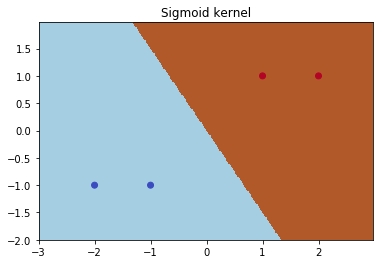

In [3]:
import matplotlib.pyplot as plt
#C is the quantity that finds the error...
mysvc= SVC(kernel='sigmoid', C = 0.01)
#fit to our SVC model
mysvc.fit(X,y)
#predict out data
Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
Z2d=Z2d.reshape(xx.shape)
#decision boundary for our data
plt.figure()
plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Sigmoid kernel')
plt.show()


In [4]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

# Exercise 2 Dataset Generation: Random datasets

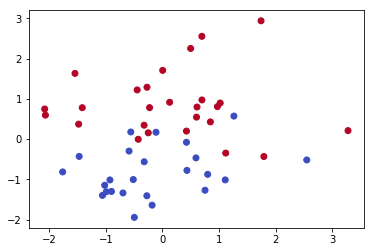

In [5]:
from sklearn.datasets import make_classification

#load the make_classification module to generate random dataset
X, y = make_classification(n_samples=50,n_features=3, n_redundant=0, n_informative=2, random_state=2, n_clusters_per_class=1)
#X
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

Work to do:
    •Create a dataset and implement a cross-validation procedure to select the best hyperparameters for a
    linear classifier and a rbf-kernel classifier (you can also test a polynomial kernel if you have time).
    • Display the decision surface found (note that you can save a plot with the instruction save).
    • Try to display the support vectors on the same plot.


In [7]:
import numpy as np
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification 

#ceate our random data
X, Y = make_classification(n_samples=70,n_features=3, n_redundant=0, n_informative=2, random_state=2, n_clusters_per_class=1)
#split our data into train and test data
X = X[:, [0,2]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

h= 0.02
svc = svm.SVC()

#parameters to tune the data
parameter_candidates = [{'C': [1, 100, 1000], 'kernel': ['linear']},
                        {'C': [1, 100, 1000], 'kernel': ['sigmoid']},
                        {'C': [1, 100, 1000], 'kernel': ['poly']},
                        {'C': [1, 100, 1000],'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
                       ]
#using the leave_one_out cross validation
leave_out = LeaveOneOut()
leave_out.get_n_splits(X)

#split our data into train test sub data
for learn,test in leave_out.split(X):
    #split model
    X_train, X_test = X[learn], X[test]
    Y_train, Y_test = Y[learn], Y[test]
    # Create a classifier object with the classifier and parameter candidates
    clf = GridSearchCV(estimator=svc, param_grid=parameter_candidates, n_jobs=-1)

    # Train the classifier on data1's feature and target data
    clf.fit(X_train, Y_train)   

# View the accuracy score
print('Best score for data1:', clf.best_score_) 
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

#After my analysis
# Best score for data1: 0.6086956521739131
# Best C: 1
# Best Kernel: poly
# Best Gamma: auto

Best score for data1: 0.6086956521739131
Best C: 1
Best Kernel: poly
Best Gamma: auto


Based on the above best parameter for our data we fit
our data into the SVM model

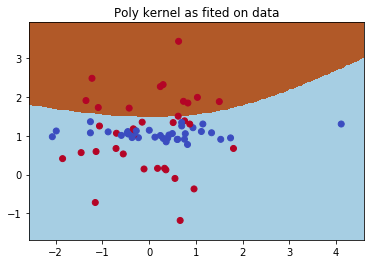

In [8]:


#split train test using Leave_One_Out cross validation

for learn,test in leave_out.split(X):
    
    # Create a classifier object with the classifier and parameter candidates
    clf = SVC(kernel='poly', C = 1.0)
    #split model
    X_train = X[learn]
    Y_train = Y[learn]
    clf.fit(X_train, Y_train)
    X_test = X[test]
    Y_test = Y[test]
    h = .02
    x_min= X_train[:, 0].min() - 0.5
    x_max= X_train[:, 0].max() + 0.5
    y_min = X_train[:, 1].min() - 0.5
    y_max = X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Create a classifier object with the classifier and parameter candidates
    
    # Train the classifier on data1's feature and target data
    
    #clf.predict(Y_test)
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
res = pred.reshape(xx.shape)
#print(pred)
plt.figure()
plt.pcolormesh(xx, yy, res, cmap=plt.cm.Paired)
# We plot also the training points
plt.title('Poly kernel as fited on data')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.show()

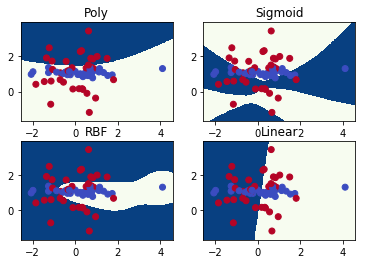

In [9]:
#plot all boundaries on the go.
scv = SVC(kernel='poly', C = 1.0)
sigmoid = SVC(kernel='sigmoid', C = 1.0)
rbf = SVC(kernel='rbf', C = 1.0)
linear = SVC(kernel='linear', C = 100.0)
#split train test using Leave_One_Out cross validation
ker_names = ['Poly', 'Sigmoid', 'RBF', 'Linear']
for learn,test in leave_out.split(X):
    
    # Create a classifier object with the classifier and parameter candidates
    clf = SVC(kernel='sigmoid', C = 1.0)
    #split model
    X_train = X[learn]
    Y_train = Y[learn]
    scv = scv.fit(X_train, Y_train)
    sigmoid = sigmoid.fit(X_train, Y_train)
    rbf = rbf.fit(X_train, Y_train)
    linear = linear.fit(X_train, Y_train)
    X_test = X[test]
    Y_test = Y[test]
    h = .02
    x_min= X_train[:, 0].min() - 0.5
    x_max= X_train[:, 0].max() + 0.5
    y_min = X_train[:, 1].min() - 0.5
    y_max = X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Create a classifier object with the classifier and parameter candidates
    
    # Train the classifier on data1's feature and target data
    
    #clf.predict(Y_test)
for i, clf in enumerate((scv, sigmoid, rbf, linear)):
    plt.subplot(2, 2, i+1)
    pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
    res = pred.reshape(xx.shape)
    #print(pred)
    plt.pcolormesh(xx, yy, res, cmap=plt.cm.GnBu)
    # We plot also the training points
    plt.title(ker_names[i])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.show()

# 3.2 Existing Datasets

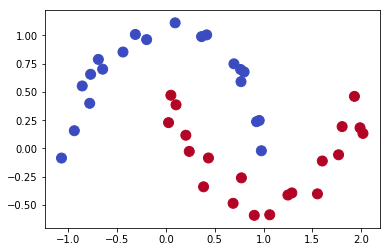

In [10]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

#make moon datasets
X, y = make_moons(noise = 0.1, random_state=1, n_samples=40)
plt.scatter(X[:,0],X[:,1], c = y, s = 100, cmap = plt.cm.coolwarm)
plt.show()

In [11]:
import numpy as np
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification 

#ceate our random data
X, Y = make_moons(noise = 0.1, random_state=1, n_samples=40)
#split our data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

h= 0.02
svc = svm.SVC()

#parameters to tune the data
parameter_candidates = [{'C': [1, 100, 1000], 'kernel': ['linear']},
                        {'C': [1, 100, 1000], 'kernel': ['sigmoid']},
                        {'C': [1, 100, 1000], 'kernel': ['poly']},
                        {'C': [1, 100, 1000],'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
                       ]
#using the leave_one_out cross validation
leave_out = LeaveOneOut()
leave_out.get_n_splits(X)

#split our data into train test sub data
for learn,test in leave_out.split(X):
    #split model
    X_train, X_test = X[learn], X[test]
    Y_train, Y_test = Y[learn], Y[test]
    # Create a classifier object with the classifier and parameter candidates
    clf = GridSearchCV(estimator=svc, param_grid=parameter_candidates, n_jobs=-1)

    # Train the classifier on data1's feature and target data
    clf.fit(X_train, Y_train)   

# View the accuracy score
print('Best score for data1:', clf.best_score_) 
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

# Best score for data1: 0.8205128205128205
# Best C: 100
# Best Kernel: linear
# Best Gamma: auto

Best score for data1: 0.8205128205128205
Best C: 100
Best Kernel: linear
Best Gamma: auto


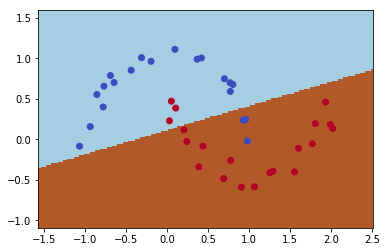

In [12]:

#split train test using Leave_One_Out cross validation

for learn,test in leave_out.split(X):
    
    # Create a classifier object with the classifier and parameter candidates
    clf = SVC(kernel='linear', C = 100)
    #split model
    X_train = X[learn]
    Y_train = Y[learn]
    clf.fit(X_train, Y_train)
    X_test = X[test]
    Y_test = Y[test]
    h = .02
    x_min= X_train[:, 0].min() - 0.5
    x_max= X_train[:, 0].max() + 0.5
    y_min = X_train[:, 1].min() - 0.5
    y_max = X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Create a classifier object with the classifier and parameter candidates
    
    # Train the classifier on data1's feature and target data
    
    #clf.predict(Y_test)
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
res = pred.reshape(xx.shape)
#print(pred)
plt.figure()
plt.pcolormesh(xx, yy, res, cmap=plt.cm.Paired)
# We plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.show()

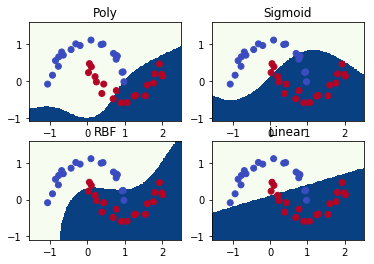

In [13]:
scv = SVC(kernel='poly', C = 1.0)
sigmoid = SVC(kernel='sigmoid', C = 1.0)
rbf = SVC(kernel='rbf', C = 1.0)
linear = SVC(kernel='linear', C = 100.0)
#split train test using Leave_One_Out cross validation
ker_names = ['Poly', 'Sigmoid', 'RBF', 'Linear']
#split train test using Leave_One_Out cross validation

for learn,test in leave_out.split(X):
    
    # Create a classifier object with the classifier and parameter candidates
    clf = SVC(kernel='linear', C = 100)
    #split model
    X_train = X[learn]
    Y_train = Y[learn]
    scv = scv.fit(X_train, Y_train)
    sigmoid = sigmoid.fit(X_train, Y_train)
    rbf = rbf.fit(X_train, Y_train)
    linear = linear.fit(X_train, Y_train)
    X_test = X[test]
    Y_test = Y[test]
    h = .02
    x_min= X_train[:, 0].min() - 0.5
    x_max= X_train[:, 0].max() + 0.5
    y_min = X_train[:, 1].min() - 0.5
    y_max = X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Create a classifier object with the classifier and parameter candidates
    
    # Train the classifier on data1's feature and target data
    
    #clf.predict(Y_test)
for i, clf in enumerate((scv, sigmoid, rbf, linear)):
    plt.subplot(2, 2, i+1)
    pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
    res = pred.reshape(xx.shape)
    #print(pred)
    plt.pcolormesh(xx, yy, res, cmap=plt.cm.GnBu)
    # We plot also the training points
    plt.title(ker_names[i])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.show()

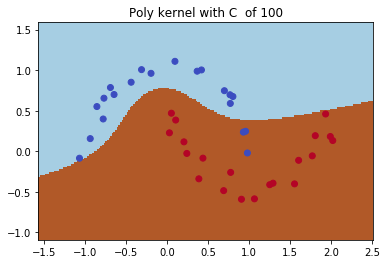

In [14]:
#split train test using Leave_One_Out cross validation

for learn,test in leave_out.split(X):
    
    # Create a classifier object with the classifier and parameter candidates
    clf = SVC(kernel='poly', C = 100)
    #split model
    X_train = X[learn]
    Y_train = Y[learn]
    clf.fit(X_train, Y_train)
    X_test = X[test]
    Y_test = Y[test]
    h = .02
    x_min= X_train[:, 0].min() - 0.5
    x_max= X_train[:, 0].max() + 0.5
    y_min = X_train[:, 1].min() - 0.5
    y_max = X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Create a classifier object with the classifier and parameter candidates
    
    # Train the classifier on data1's feature and target data
    
    #clf.predict(Y_test)
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
res = pred.reshape(xx.shape)
#print(pred)
plt.figure()
plt.pcolormesh(xx, yy, res, cmap=plt.cm.Paired)
# We plot also the training points
plt.title('Poly kernel with C  of 100')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

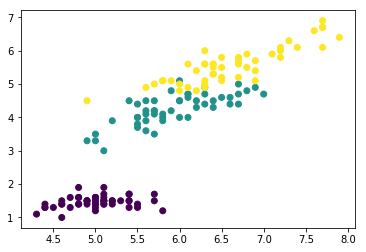

In [16]:
from sklearn.datasets import load_iris #loading the dataset
import pandas as pd
import os
from matplotlib import pyplot as plt

#load Iris dataset
irisData = load_iris()
X = irisData.data
Y = irisData.target
X = X[:, [0,2]]
#X
#print(Y)
x=0
y=1
plt.scatter(X[:, x], X[:, y], c = Y)
plt.show()

In [17]:
import numpy as np
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification 

#ceate our random data
X = irisData.data
Y = irisData.target
X = X[:, [0,2]]
#split our data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

h= 0.02
svc = svm.SVC()

#parameters to tune the data
parameter_candidates = [{'C': [1, 100, 1000], 'kernel': ['linear']},
                        {'C': [1, 100, 1000], 'kernel': ['sigmoid']},
                        {'C': [1, 100, 1000], 'kernel': ['poly']},
                        {'C': [1, 100, 1000],'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
                       ]
#using the leave_one_out cross validation
leave_out = LeaveOneOut()
leave_out.get_n_splits(X)

#split our data into train test sub data
for learn,test in leave_out.split(X):
    #split model
    X_train, X_test = X[learn], X[test]
    Y_train, Y_test = Y[learn], Y[test]
    # Create a classifier object with the classifier and parameter candidates
    clf = GridSearchCV(estimator=svc, param_grid=parameter_candidates, n_jobs=-1)

    # Train the classifier on data1's feature and target data
    clf.fit(X_train, Y_train)   

# View the accuracy score
print('Best score for data1:', clf.best_score_) 
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best score for data1: 0.9530201342281879
Best C: 100
Best Kernel: linear
Best Gamma: auto


In [18]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

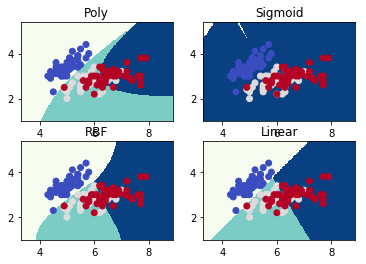

In [19]:
#split train test using Leave_One_Out cross validation
X = irisData.data[:, :-2]
Y = irisData.target
scv = SVC(kernel='poly', C = 1.0)
sigmoid = SVC(kernel='sigmoid', C = 1.0)
rbf = SVC(kernel='rbf', C = 1.0)
linear = SVC(kernel='linear', C = 100.0) #best kernel
#split train test using Leave_One_Out cross validation
ker_names = ['Poly', 'Sigmoid', 'RBF', 'Linear']

#split our data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

h= 0.02

for learn,test in leave_out.split(X):
    
    # Create a classifier object with the classifier and parameter candidates
    clf = SVC(kernel='linear', C = 100)
    #split model
    X_train = X[learn]
    Y_train = Y[learn]
    # Create a classifier object with the classifier and parameter candidates
    scv = scv.fit(X_train, Y_train)
    sigmoid = sigmoid.fit(X_train, Y_train)
    rbf = rbf.fit(X_train, Y_train)
    linear = linear.fit(X_train, Y_train)
    X_test = X[test]
    Y_test = Y[test]
    h = .02
    x_min= X_train[:, 0].min() - 1
    x_max= X_train[:, 0].max() + 1
    y_min = X_train[:, 1].min() - 1
    y_max = X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    #clf.predict(Y_test)
for i, clf in enumerate((scv, sigmoid, rbf, linear)):
    plt.subplot(2, 2, i+1)
    pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
    res = pred.reshape(xx.shape)
    #print(pred)
    plt.pcolormesh(xx, yy, res, cmap=plt.cm.GnBu)
    # We plot also the training points
    plt.title(ker_names[i])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.show()

From the decision boundaries plotted above for the iris dataset; we can observe, the linear kernl SVM is best at
predicting the 3class iris data. Followed closely by the rbf kernel...Sigmoid performed the worst from our analysis.

# 4 'Real' Dataset

In [20]:
#input the directory we are working on to import data1
os.chdir("C:/Users/kennedy/Desktop/SVM")
import pandas as pd

#import the ozone data file
input_file = "ozone.dat"
df = pd.read_csv(input_file, sep = " ", header = 0)
#X = df.drop(['STATION'], axis = 1)
df.head()
#here we create a column thats maps the ozone column
#if the ozone column has values greater than 150 it returns Ture 
#Else it returns False
#X #target
df.hist()
plt.show()

In [21]:
df['STATION'] = pd.Categorical(df['STATION'], ordered = False)
df['JOUR'] = pd.Categorical(df['JOUR'], ordered = False)
df['O3obs'] = pd.Categorical(df['O3obs'], ordered = False)
df.dtypes
df.describe()

MOCAGE        TEMPE        RMH2O          NO2           NO  \
count  1041.000000  1041.000000  1041.000000  1041.000000  1041.000000   
mean    127.219693    23.883381     0.010251     3.504645     0.657417   
std      39.820186     5.217462     0.003731     4.043308     0.844180   
min      46.400000    10.400000     0.002850     0.258000     0.001000   
25%      97.500000    20.200000     0.007630     1.248000     0.236000   
50%     125.600000    23.800000     0.009850     2.109000     0.388000   
75%     153.600000    27.600000     0.012440     4.062000     0.744000   
max     284.700000    38.000000     0.027530    44.396000     9.429000   

           VentMOD      VentANG  
count  1041.000000  1041.000000  
mean      5.907186     0.163111  
std       3.054307     0.708288  
min       0.141420    -1.570790  
25%       3.962320    -0.394790  
50%       5.597300     0.278300  
75%       7.106300     0.692640  
max      19.891000     1.570790

Data preprocessing

In [22]:
#preprocessing our data--> data transformation
from math import sqrt, log

df["SRMH2O"] = df["RMH2O"].map(lambda x : sqrt(x))
df["LNO2"] = df["NO2"].map(lambda x : log(x))
df["LNO"] = df["NO"].map(lambda x: log(x))
#df
#Now we delete the untransformed data
del df['RMH2O']
del df['NO2']
del df['NO']
df

JOUR O3obs  MOCAGE  TEMPE STATION  VentMOD  VentANG    SRMH2O      LNO2  \
0       1    91    93.2   21.5     Aix   9.5000 -0.64350  0.092033  0.471253   
1       1   100   104.6   20.2     Aix   8.0100 -0.04996  0.093862  0.751888   
2       0    82   103.6   17.4     Aix   9.3771 -0.12832  0.097519  0.505009   
3       0    94    94.8   18.8     Aix   9.4578 -0.34516  0.092466  0.854415   
4       0   107    99.0   23.7     Aix   7.8791 -0.41822  0.085499  0.502592   
5       0   150   114.3   23.6     Aix   6.3127  0.06341  0.108720  1.670721   
6       0   164   127.7   26.6     Aix   4.8042  0.04164  0.096799  1.044156   
7       1   135   164.3   23.5     Aix   4.8795  0.79989  0.104259  2.755760   
8       1   121   144.1   23.3     Aix   5.1088  0.70226  0.108074  2.175547   
9       0   129   112.8   23.7     Aix   5.4406  0.94200  0.104451  2.939744   
10      0   118    72.6   22.2     Aix   5.9641 -0.60661  0.127515  1.448800   
11      0    48   146.0   14.3     Aix   5.8034 -0.03447  0.120540  2.614765   
12      0    97    87.5   18.5     Aix   7.5273  0.33856  0.097929  1.417308   
13      1    83   158.9   15.4     Aix   2.5942  0.48089  0.120665  2.327668   
14      1    73   112.6   19.6     Aix   8.8752 -0.58488  0.110454  0.670390   
15      0    91    76.9   21.7     Aix  12.3004 -0.63537  0.082765  0.323532   
16      0    70    81.8   24.4     Aix   9.5000 -0.64350  0.094340  0.449163   
17      0   125   178.6   24.8     Aix   6.5192  0.72027  0.109818  2.106083   
18      0   168   127.9   28.2     Aix   7.1309  0.38832  0.117771  1.532989   
19      0   113   109.3   26.0     Aix   5.9816  0.66691  0.110454  2.508786   
20      1   118   113.0   26.2     Aix   6.2769  0.53496  0.103150  1.529312   
21      1   130   136.3   27.2     Aix   6.0033  0.52328  0.095499  1.453018   
22      0   179   141.1   27.8     Aix   5.1313  0.57719  0.100499  2.035490   
23      0   196   131.4   29.1     Aix   6.0902  0.51507  0.095864  1.650196   
24      0   160   141.1   29.5     Aix   6.1221  0.66964  0.101637  1.618001   
25      0   180   163.6   29.5     Aix   5.5227  0.55284  0.088826  2.142416   
26      0   103   141.6   29.1     Aix   5.2839  0.51445  0.081425  1.895218   
27      1   214   159.9   33.2     Aix   7.2615  0.39585  0.119624  1.416338   
28      1   178   138.1   30.5     Aix   6.0877  0.73892  0.122841  1.922056   
29      0   160   155.1   30.9     Aix   7.2422 -0.61864  0.123531  0.911881   
...   ...   ...     ...    ...     ...      ...      ...       ...       ...   
1011    0   111   152.3   21.9     Pla   7.5060 -0.03998  0.101784  1.518199   
1012    1    73   123.5   18.6     Pla   8.0000  0.00000  0.078994  1.436750   
1013    1    78   159.1   16.1     Pla   6.3820 -0.61843  0.091652  1.069183   
1014    0    83   145.3   19.5     Pla  17.3658 -0.85467  0.093862 -0.093212   
1015    0    73   119.2   21.8     Pla  16.1276 -0.75909  0.067454 -0.410980   
1016    0   115   174.6   20.3     Pla   5.5362  0.35031  0.096333  1.153100   
1017    0   100   119.8   19.4     Pla   6.5000  0.39479  0.082219 -0.420071   
1018    0    89   149.4   22.6     Pla   7.9310 -0.40158  0.089499  1.670721   
1019    1    70   148.0   18.8     Pla   3.0017  0.03332  0.095603  1.421420   
1020    1   104   123.0   18.1     Pla   2.4739 -0.24498  0.116533 -0.342490   
1021    0   122   208.4   21.2     Pla   3.0265  0.13255  0.105404  1.141033   
1022    0   119   208.3   22.6     Pla   3.4785  1.24905  0.104642  0.983201   
1023    0   110   159.9   22.9     Pla   4.5277  0.53284  0.082885  0.682086   
1024    0    94   131.2   20.8     Pla   5.3759  0.75909  0.099448 -0.583396   
1025    0   104   195.2   23.7     Pla   3.7590  0.49935  0.098234  0.470004   
1026    1   100   175.6   23.7     Pla   4.9031  0.20540  0.097417  0.369492   
1027    1    90   140.5   22.3     Pla   4.9820  0.89919  0.090609 -0.879477   
1028    0    89   162.6   19.2     Pla  16.6652 -0.32365  0.097724  0.515216   
1029 

In [23]:
#the new histogram of our transformed data
df.hist()
plt.show()

#from the histogram we can easily extract features that would be relavant for predicting ozone
#e.g MOCAGE, TEMPE, VentANG, VentMOD, RMH2O

In [317]:
from sklearn.preprocessing import StandardScaler

#X = StandardScaler().fit_transform(df)
#X

In [24]:
#Now leta map the data 

df['Target'] = df['O3obs'].map(lambda x: x > 150)
df.head()

JOUR O3obs  MOCAGE  TEMPE STATION  VentMOD  VentANG    SRMH2O      LNO2  \
0    1    91    93.2   21.5     Aix   9.5000 -0.64350  0.092033  0.471253   
1    1   100   104.6   20.2     Aix   8.0100 -0.04996  0.093862  0.751888   
2    0    82   103.6   17.4     Aix   9.3771 -0.12832  0.097519  0.505009   
3    0    94    94.8   18.8     Aix   9.4578 -0.34516  0.092466  0.854415   
4    0   107    99.0   23.7     Aix   7.8791 -0.41822  0.085499  0.502592   

        LNO Target  
0 -0.858022  False  
1 -0.632993  False  
2 -0.761426  False  
3 -0.355247  False  
4 -0.794073  False

Data segmentation into samples and label

In [25]:
df.head()
df0 = pd.get_dummies(df[['JOUR', 'STATION']])
del df0['JOUR_0']
df0.head()

JOUR_1  STATION_Aix  STATION_Als  STATION_Cad  STATION_Pla  STATION_Ram
0       1            1            0            0            0            0
1       1            1            0            0            0            0
2       0            1            0            0            0            0
3       0            1            0            0            0            0
4       0            1            0            0            0            0

In [26]:
XZ = df[["MOCAGE", "TEMPE", "VentMOD", "VentANG", "SRMH2O", "LNO2", "LNO"]] 
X = pd.concat([df0,XZ], axis = 1)
X

JOUR_1  STATION_Aix  STATION_Als  STATION_Cad  STATION_Pla  STATION_Ram  \
0          1            1            0            0            0            0   
1          1            1            0            0            0            0   
2          0            1            0            0            0            0   
3          0            1            0            0            0            0   
4          0            1            0            0            0            0   
5          0            1            0            0            0            0   
6          0            1            0            0            0            0   
7          1            1            0            0            0            0   
8          1            1            0            0            0            0   
9          0            1            0            0            0            0   
10         0            1            0            0            0            0   
11         0            1            0            0            0            0   
12         0            1            0            0            0            0   
13         1            1            0            0            0            0   
14         1            1            0            0            0            0   
15         0            1            0            0            0            0   
16         0            1            0            0            0            0   
17         0            1            0            0            0            0   
18         0            1            0            0            0            0   
19         0            1            0            0            0            0   
20         1            1            0            0            0            0   
21         1            1            0            0            0            0   
22         0            1            0            0            0            0   
23         0            1            0            0            0            0   
24         0            1            0            0            0            0   
25         0            1            0            0            0            0   
26         0            1            0            0            0            0   
27         1            1            0            0            0            0   
28         1            1            0            0            0            0   
29         0            1            0            0            0            0   
...      ...          ...          ...          ...          ...          ...   
1011       0            0            0            0            1            0   
1012       1            0            0            0            1            0   
1013       1            0            0            0            1            0   
1014       0            0            0            0            1            0   
1015       0            0            0            0            1            0   
1016       0            0            0            0            1            0   
1017       0            0            0            0            1            0   
1018       0            0            0            0            1            0   
1019       1            0            0            0            1            0   
1020       1            0            0            0            1            0   
1021       0            0            0            0            1            0   
1022       0            0            0            0            1            0   
1023       0            0            0            0            1            0   
1024       0            0            0            0            1            0   
1025       0            0            0            0            1            0   
1026       1            0            0            0            1            0   
1027       1            0            0            0            1            0   
1028       0            0            

In [69]:
#convert the True False to zeros and ones
Y = df['Target'].map(lambda x: int(x))
#The ozone classification target
Y_ozone = df['O3obs']
Y_ozone.shape
Y_ozone.hist()
plt.show()

Model selection process

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification 

#ceate our random data
#split our data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y_ozone, test_size=.3, random_state=0)

h= 0.02
svc = svm.SVC()

#{'C': [1, 5, 10], 'kernel': ['poly']}
#parameters to tune the data
# parameter_candidates = [{'C': [1], 'kernel': ['linear']},
#                         {'C': [1], 'kernel': ['sigmoid']},
#                         {'C': [1],'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
#                        ]
#using the leave_one_out cross validation
leave_out = LeaveOneOut()
leave_out.get_n_splits(X)
svc = svm.SVC()
#split our data into train test sub data
for learn,test in leave_out.split(X):
    #split model
    X_train = X.loc[learn]
    Y_train = Y.loc[learn]
    X_test = X.loc[test]
    Y_test = Y.loc[test]
    Yoz_train = Y_ozone.loc[learn]
    Yoz_test = Y_ozone.loc[test]
    # Create a classifier object with the classifier and parameter candidates
    #clf = GridSearchCV(estimator=svc, param_grid=parameter_candidates, n_jobs=-1)
    #clf1 = GridSearchCV(estimator=svc, param_grid=parameter_candidates, n_jobs=-1)

    # Train the classifier on data1's feature and target data
    clf.fit(X_train, Y_train)
    #clf1.fit(X_train, Yoz_train)

# View the accuracy score
print("===BEST RESULT FOR THE TARGET LABEL===")
print('Best score for data1:', clf.best_score_) 
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)
# print("===BEST RESULT FOR THE OZONE LABEL===")
# print('Best score for data1:', clf1.best_score_) 
# # View the best parameters for the model found using grid search
# print('Best C:',clf1.best_estimator_.C) 
# print('Best Kernel:',clf1.best_estimator_.kernel)
# print('Best Gamma:',clf1.best_estimator_.gamma)


In [ ]:
#scv = SVC(kernel='poly', C = 1.0)
sigmoid = SVC(kernel='sigmoid', C = 1.0)
rbf = SVC(kernel='rbf', C = 1.0)
linear = SVC(kernel='linear', C = 100.0) #best kernel
#split train test using Leave_One_Out cross validation
ker_names = ['Poly', 'Sigmoid', 'RBF', 'Linear']

#split our data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

h= 0.02

for learn,test in leave_out.split(X):
    
    # Create a classifier object with the classifier and parameter candidates
    clf = SVC(kernel='linear', C = 100)
    #split model
    X_train = X.loc[learn]
    Y_train = Y.loc[learn]
    # Create a classifier object with the classifier and parameter candidates
    #scv = scv.fit(X_train, Y_train)
    sigmoid = sigmoid.fit(X_train, Y_train)
    rbf = rbf.fit(X_train, Y_train)
    linear = linear.fit(X_train, Y_train)
    X_test = X.loc[test]
    Y_test = Y.loc[test]
    #h = .02
    #x_min= X_train[:, 0].min() - 1
    #x_max= X_train[:, 0].max() + 1
    #y_min = X_train[:, 1].min() - 1
    #y_max = X_train[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    #clf.predict(Y_test)
for i, clf in enumerate((scv, sigmoid, rbf, linear)):
    plt.subplot(2, 2, i+1)
    pred = clf.predict(X_test) # we predict all the grid
    #res = pred.reshape(xx.shape)
    #print(pred)
    #plt.pcolormesh(xx, yy, res, cmap=plt.cm.GnBu)
    # We plot also the training points
    print("MSE=",mean_squared_error(pred,Y_test))
    print("R2=",r2_score(Y_test,pred))
    #plt.plot(pred, Y_test)
    #plt.title(ker_names[i])
    #plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
#plt.show()

In [54]:
import numpy as np
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification 

#split train test using Leave_One_Out cross validation
#kf = KFold(n_splits = 2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

clf = SVC(kernel='linear', C = 1)

clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
#pred = clf.predict(Y_test)

# Create a classifier object with the classifier and parameter candidates

# Train the classifier on data1's feature and target data 
#clf.predict(Y_test)
print("===LINEAR KERNEL ANALYSIS===")
print("best score {}".format(score.mean()))
#print("prediction for ozone is: {}".format(pred.reshape(1, -1)))
#print("Peak prediction for ozone: {}".format(max(pred.reshape(1, -1))))
# pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
# res = pred.reshape(xx.shape)
# #print(pred)
# plt.figure()
# plt.pcolormesh(xx, yy, res, cmap=plt.cm.Paired)
# # We plot also the training points
# plt.title('Linear kernel with C  of 1')
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
# plt.show()

===LINEAR KERNEL ANALYSIS===
best score 0.8722044728434505


In [55]:
import numpy as np
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification 

#split train test using Leave_One_Out cross validation
#kf = KFold(n_splits = 2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

clf = SVC(kernel='sigmoid', C = 1)

clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
#pred = clf.predict(Y_test)

# Create a classifier object with the classifier and parameter candidates

# Train the classifier on data1's feature and target data 
#clf.predict(Y_test)
print("===LINEAR KERNEL ANALYSIS===")
print("best score {}".format(score.mean()))
#print("prediction for ozone is: {}".format(pred.reshape(1, -1)))
#print("Peak prediction for ozone: {}".format(max(pred.reshape(1, -1))))
# pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
# res = pred.reshape(xx.shape)
# #print(pred)
# plt.figure()
# plt.pcolormesh(xx, yy, res, cmap=plt.cm.Paired)
# # We plot also the training points
# plt.title('Linear kernel with C  of 1')
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
# plt.show()

===LINEAR KERNEL ANALYSIS===
best score 0.8146964856230032


In [57]:
import numpy as np
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification 

#split train test using Leave_One_Out cross validation
#kf = KFold(n_splits = 2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

clf = SVC(kernel='rbf', C = 1)

clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
#pred = clf.predict(Y_test)

# Create a classifier object with the classifier and parameter candidates

# Train the classifier on data1's feature and target data 
#clf.predict(Y_test)
print("===LINEAR KERNEL ANALYSIS===")
print("best score {}".format(score.mean()))
#print("prediction for ozone is: {}".format(pred.reshape(1, -1)))
#print("Peak prediction for ozone: {}".format(max(pred.reshape(1, -1))))
# pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
# res = pred.reshape(xx.shape)
# #print(pred)
# plt.figure()
# plt.pcolormesh(xx, yy, res, cmap=plt.cm.Paired)
# # We plot also the training points
# plt.title('Linear kernel with C  of 1')
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
# plt.show()

===LINEAR KERNEL ANALYSIS===
best score 0.8498402555910544


===LINEAR KERNEL ANALYSIS===
best score 0.5546763124021512
prediction for ozone is: [ 147.18157095  101.68922197   90.74020665   61.00405203  120.51426935
  176.90900974   86.69066001  157.65716768  127.55280423  142.15711132
  134.35570751  136.31348687  110.60562719  150.54269217  151.22169845
  126.20795712  123.02766674  141.78383299   63.55729771  168.31007459
  113.77900899  108.61452945  101.17415964  125.00434868   79.73675092
   84.29453896  112.1843589   112.4739561   121.46642815   91.90608108
   60.62766739  139.04185617  154.25609891  115.17831915  145.73087937
   87.09539338  130.62739435   87.6660692   107.00312136  172.57317556
   80.5791513    70.76562623  124.65085978  122.61830593   74.92462775
   61.6884951   134.58649929   91.05724705  165.08738183   64.19418082
  130.03441774   85.10718422   81.61525347   72.28931755  104.17843109
  115.74383832  104.89205074   76.74871414  149.36264133   93.39426066
  111.34836913   93.08244356   97.26521401  184.91455402  121.65

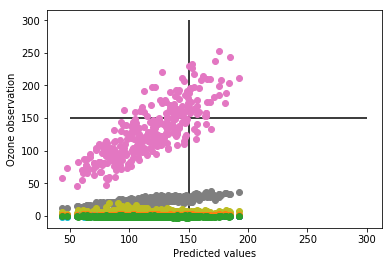

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification 
from sklearn import linear_model


#split train test using Leave_One_Out cross validation
#kf = KFold(n_splits = 2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_ozone, test_size=.3, random_state=0)

clf = linear_model.LinearRegression()

clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
pred = clf.predict(X_test)
# Create a classifier object with the classifier and parameter candidates

# Train the classifier on data1's feature and target data 
#clf.predict(Y_test)
print("===LINEAR KERNEL ANALYSIS===")
print("best score {}".format(score.mean()))
print("prediction for ozone is: {}".format(pred))
print("Peak prediction for ozone: {}".format(max(pred)))
plt.plot(pred, X_test, "o")
plt.xlabel(u"Predicted values")
plt.ylabel(u"Ozone observation")
plt.hlines(150,50,300)
plt.vlines(150,0,300)
plt.show()
# pred = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # we predict all the grid
# res = pred.reshape(xx.shape)
# #print(pred)
# plt.figure()
# plt.pcolormesh(xx, yy, res, cmap=plt.cm.Paired)
# # We plot also the training points
# plt.title('Linear kernel with C  of 1')
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
# plt.show()